**Baseline Result Analysis**

In [2]:
import pandas as pd

deepdta = pd.read_csv('./base_res/deepdta_kiba_logits.csv')
graphdta = pd.read_csv('./base_res/graphdta_kiba_logits.csv')
mmsg = pd.read_csv('/data/qingyuyang/MMSG-DTA/results/20250928_140930_kiba_warm_fold0/test_logits.csv')
gt = pd.read_csv('/data/qingyuyang/dta_ours/data/kiba/pairs.csv')

In [3]:
deepdta = pd.merge(deepdta, gt, on=['drug_id', 'prot_id'], how='inner')
deepdta.drop(['index'], axis=1, inplace=True)
deepdta['error'] = abs(deepdta['logit'] - deepdta['affinity'])
deepdta = deepdta.sort_values(by='error', ignore_index=True)
deepdta.head()

,drug_id,prot_id,logit,affinity,error
0,5c526f83d70dc63de1978456b3f1dde7,9c8ee75c7abd6c87bd994f32741fc53c,11.099987,11.100000,0.000013
1,77fc99316f835d2e6197e9ac780ff578,0a086aea9f0b3c646005c57bc108a159,11.099980,11.100000,0.000020
2,b97ff035d5a01d756d8815d159c5c9a9,298eb2b0a64ce9a00143db9fa208db71,12.900027,12.899998,0.000029
3,85d80b72eddb7ca231e87e017aafad2c,8eb04104be33f0a0cb376ed145e684ff,11.399967,11.400000,0.000033
4,9f948fe679460ffe2f9a30f091471dfa,f753f2b2d9752a30646c83e8630d1df8,11.999964,11.999998,0.000035


In [4]:
graphdta = pd.merge(graphdta, gt, on=['drug_id', 'prot_id'], how='inner')
graphdta.drop(['index'], axis=1, inplace=True)
graphdta['error'] = abs(graphdta['logit'] - graphdta['affinity'])
graphdta = graphdta.sort_values(by='error', ignore_index=True)
graphdta.head()

,drug_id,prot_id,logit,affinity,error
0,dee14f759b6202270c247bc106525cd1,7e8ffaa24c4c9dbf3298fa9de914fb5a,11.400002,11.4,0.000002
1,be987e12f15bc057d730167efe1726b9,55d9582b969948fcda3098f410b53e15,11.599996,11.6,0.000004
2,0af4c08a74fb68a6e24cd9622bcb0b2d,7c465f9a42dc946204c257c884beda6a,11.199996,11.2,0.000004
3,9a4ff466814fc7a9bfa70029eebd4590,986a9393aebc695a16c7b3e597670046,11.199988,11.2,0.000012
4,e68b57bd062f2734784c30f49bd6736d,d7cb57dfd70769758593c4ff8882c5dd,11.599987,11.6,0.000013


In [5]:
mmsg = pd.merge(mmsg, gt, on=['drug_id', 'prot_id'], how='inner')
mmsg.drop(['index'], axis=1, inplace=True)
mmsg['error'] = abs(mmsg['logit'] - mmsg['affinity'])
mmsg = mmsg.sort_values(by='error', ignore_index=True)
mmsg.head()

,drug_id,prot_id,logit,affinity,error
0,f9a45d4f1c1bb73dcca6bd5726044cb0,a344473aeb2d246c0679969778ba5145,11.099959,11.1,0.000041
1,007d4166b8609b76fb00b9f7c781a827,3e8d19052b87de5bfc4954b226c2ff8f,11.100044,11.1,0.000044
2,b8c9358f5040c90ac8291d499ee7e1e8,3e8d19052b87de5bfc4954b226c2ff8f,11.100046,11.1,0.000046
3,253382fda89160bcc4dffba317b7fad2,22b838d24d13b1a0768a8c4750a19051,11.400051,11.4,0.000051
4,a321e2162f32e79feef47d3a07eb05ed,b70ca5932565c6b507515b708fa01636,11.199944,11.2,0.000056


In [6]:
prots = pd.read_csv('/data/qingyuyang/dta_ours/data/kiba/prots.csv')
pid2pdb = dict(zip(prots['prot_id'], prots['pdb']))
drugs = pd.read_csv('/data/qingyuyang/dta_ours/data/kiba/drugs.csv')
did2smiles = dict(zip(drugs['drug_id'], drugs['iso_smiles']))

In [7]:
dd = list(deepdta[:100]['drug_id'].map(did2smiles))
gd = list(graphdta[:100]['drug_id'].map(did2smiles))
md = list(mmsg[:100]['drug_id'].map(did2smiles))

In [8]:
import os
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import GraphDescriptors
from tqdm import tqdm

# folder = './drug_analysis'
# os.makedirs(folder, exist_ok=True)

deepdta_bertz = []
for i, smiles in tqdm(enumerate(dd), total=len(dd)):
    mol = Chem.MolFromSmiles(smiles)

    bertz = GraphDescriptors.BertzCT(mol)
    deepdta_bertz.append(bertz)

graphdta_bertz = []
for i, smiles in tqdm(enumerate(gd), total=len(gd)):
    mol = Chem.MolFromSmiles(smiles)

    bertz = GraphDescriptors.BertzCT(mol)
    graphdta_bertz.append(bertz)

mmsg_bertz = []
for i, smiles in tqdm(enumerate(md), total=len(md)):
    mol = Chem.MolFromSmiles(smiles)

    bertz = GraphDescriptors.BertzCT(mol)
    mmsg_bertz.append(bertz)

count_df = pd.DataFrame({'DeepDTA': deepdta_bertz, 'GraphDTA': graphdta_bertz, 'MMSG-DTA': mmsg_bertz})
count_df

100%|██████████| 100/100 [00:00<00:00, 1102.63it/s]


,DeepDTA,GraphDTA,MMSG-DTA
0,1009.567462,1029.285997,1146.121673
1,1152.878567,1275.411758,1010.214092
2,914.370373,1120.012675,839.008753
3,709.863013,932.639107,1101.642319
4,756.774663,1497.517513,1046.430403
...,...,...,...
95,1375.389202,689.788419,1071.289059
96,1626.676204,835.189855,847.922803
97,830.787398,551.323942,1185.797477
98,1009.567462,852.965601,576.062414


In [10]:
base_res_folder = './base_res'
os.makedirs(base_res_folder, exist_ok=True)

count_df.to_csv(f'{base_res_folder}/drug_count.csv', index=False)

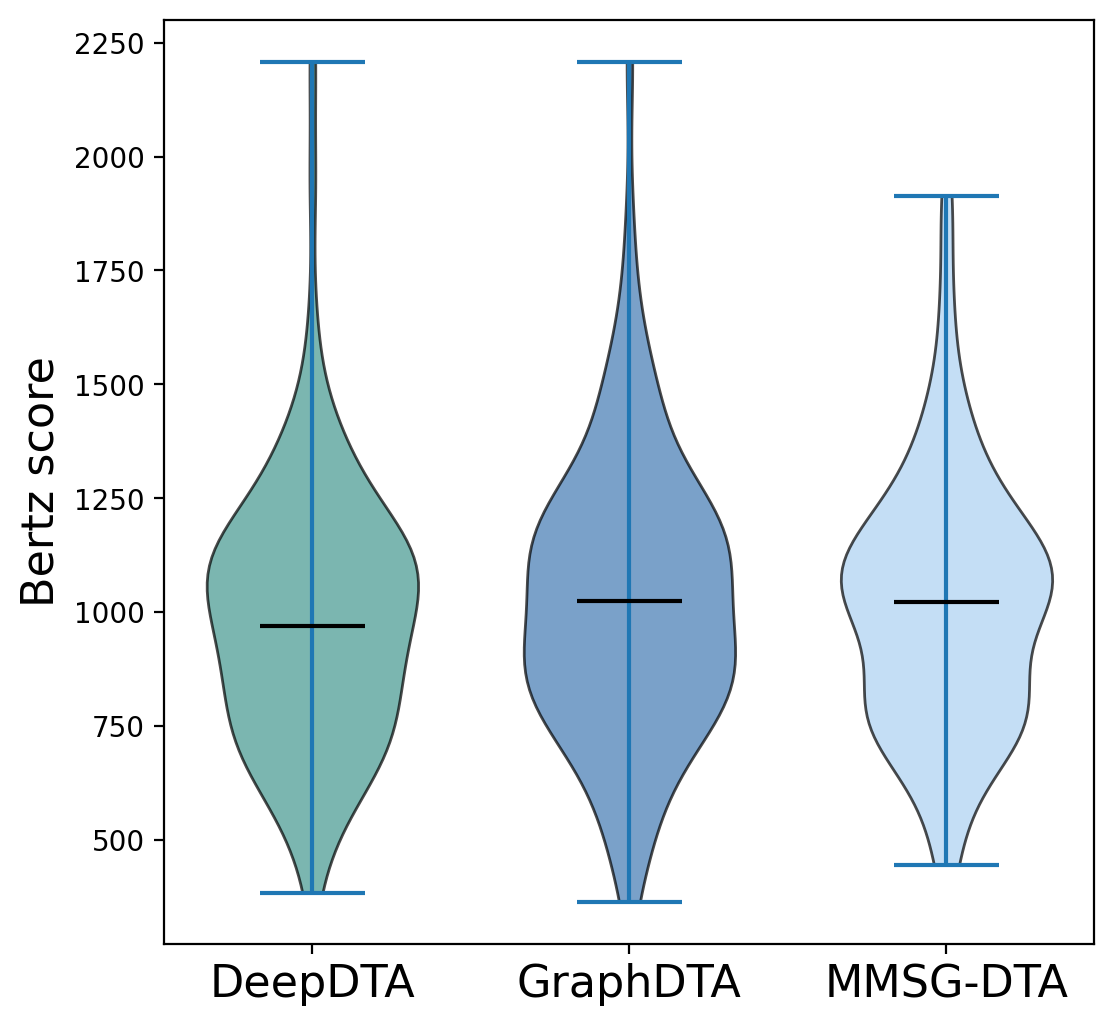

In [11]:
import matplotlib.pyplot as plt

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 200

# 创建画布
plt.figure(figsize=(6, 6))

# 绘制小提琴图，并设置位置和宽度
parts = plt.violinplot(count_df.values, positions=[0.7, 1, 1.3], widths=0.2, showmeans=False, showmedians=True)

# 设置 x 轴标签
plt.xticks([0.7, 1, 1.3], count_df.columns, fontsize=16)

# 设置标题和 y 轴标签
plt.ylabel('Bertz score', fontsize=16)

colors = ['#43978F', '#427AB2', '#ABD0F1']

# 美化小提琴图颜色
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

parts['cmedians'].set_color('black')

plt.savefig(f'./{base_res_folder}/drug_vis.png')

# 显示图形
plt.show()